In today's lecture, we'll learn more about a widely-used rootfinding technique, **the secant method**, which if used to find root's for $n>1$ is also known as **Broyden's Method**.

The update is 
$$
x_{i+1}=x_i - \frac{f(x_i)(x_i-x_{i-1})}{f(x_i)-f(x_{i-1})},
$$
so it requires two initial values.  

How does it converge compared to bisection and Newton's method?  We apply it to $f(x)=x^2-1$, starting "close" to 1.





In [1]:
%matplotlib inline
def fx(x):
    return x**2-1

def dfdx(x):
    return 2*x

def Newton(func,deriv,guess,tol):
    iterates=[]
    iterates.append(guess)
    while abs(func(guess) > tol):
        temp=guess-func(guess)/deriv(guess)
        iterates.append(guess)
        guess=temp
    return iterates

def Secant(func,guess,old=0,tol=1E-15):
    iterates=[old,guess]
    while abs(func(guess)) > tol:
        temp=guess-func(guess)*(guess-old)/(func(guess)-func(old))
        iterates.append(guess)
        old=guess
        guess=temp
    return iterates

new=Newton(fx,dfdx,1.5,1E-15)
sec=Secant(fx,.5,2.0,1E-15)

/Users/Undertrick/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


[1.5, 1.5, 1.0833333333333333, 1.0032051282051282, 1.0000051200131073, 1.000000000013107]
[2.0, 0.5, 0.5, 0.8, 1.0769230769230769, 0.9918032786885246, 0.9996952148735142, 1.0000012544517356, 0.9999999998088018]


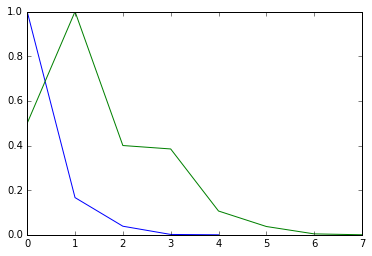

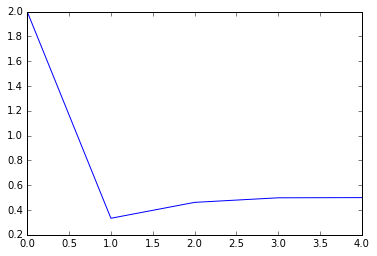

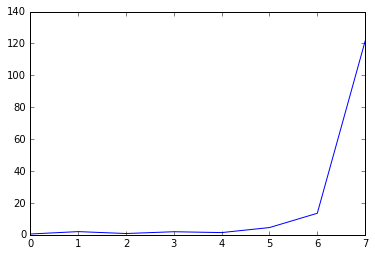

In [2]:
print new
print sec
import matplotlib.pyplot as plt
import numpy as np
new=np.array(new)
sec=np.array(sec)
plt.plot((np.abs(new[1:]-1)/np.abs(new[:-1]-1)))
plt.plot((np.abs(sec[1:]-1)/np.abs(sec[:-1]-1)))

plt.figure()
plt.plot((np.abs(new[1:]-1)/np.abs(new[:-1]-1)**2))

plt.figure()
plt.plot((np.abs(sec[1:]-1)/np.abs(sec[:-1]-1)**2))

[2, 4, 6, 8, 10, 12]


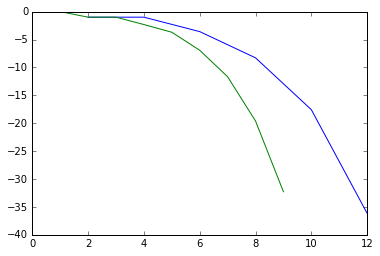

In [3]:
new_evals=[x for x in xrange(2,2*new.size+1,2)]
sec_evals=[x for x in xrange(1,sec.size+1)]
print new_evals

plt.figure()

plt.plot(np.array(new_evals),np.log2(np.abs(new-1)))

plt.plot(np.array(sec_evals),np.log2(np.abs(sec-1)))

Iterate= 0
Residual= 1
Iteration= 20
0.5 2.0
-0.75 3.0
0.8 2.0
-0.36 3.0
0.928571428571 2.0
-0.137755102041 1.5
0.928571428571 1.01869158879
-0.137755102041 0.0377325530614
0.999314364073 1.01869158879
-0.00137080175802 0.0377325530614
0.999993649362 1.01869158879
-1.27012351949e-05 0.0188662765307
0.999993649362 1.0000062288
-1.27012351949e-05 1.24576388445e-05
0.99999999998 1.0000062288
-3.95568022782e-11 1.24576388445e-05
1.0 1.0000062288
-2.22044604925e-16 6.22881942225e-06
1.0 1.0000062288
0.0 6.22881942225e-06
1.0 1.0000062288
0.0 6.22881942225e-06
1.0 1.0000062288
0.0 6.22881942225e-06
1.0 1.0000062288
0.0 6.22881942225e-06
1.0 1.0000062288
0.0 6.22881942225e-06
1.0 1.0000062288
0.0 6.22881942225e-06
1.0 1.0000062288
0.0 6.22881942225e-06
1.0 1.0000062288
0.0 6.22881942225e-06
1.0 1.0000062288
0.0 6.22881942225e-06
1.0 1.0000062288
0.0 6.22881942225e-06
Iterate= 0
Residual= 1
Iteration= 20


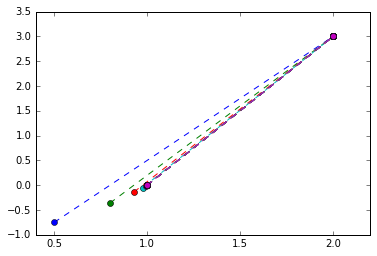

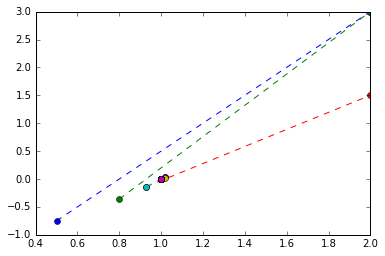

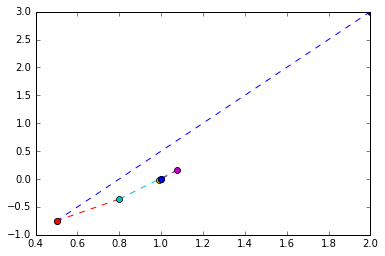

In [7]:
import solvers
plt.figure()
reg_fal=solvers.BracketSolver(fx,guess=0,tolerance=1E-15,left=0.5,right=2.0)
reg_fal.solve('regula falsi')
reg_fal.state()
plt.figure()
imp_rf=solvers.BracketSolver(fx,guess=0,tolerance=1E-15,left=0.5,right=2.0)
imp_rf.solve('AB')
imp_rf.state()
plt.figure()
for x in xrange(len(sec_evals)-1):
    plt.plot([sec[x],sec[x+1]],[fx(sec[x]),fx(sec[x+1])],linestyle='dashed',marker='o')
    

The secant method used successive guesses and linear interpolation to find a root.  There are other methods, based on
interpolating data with higher degree polynomials, and then using deterministic root finding on the polynomial to find the next guess.


### Improvements on Regula Falsi

Typically involve adjusting the weight of the "picked again" bracket.




[0, 0.5, 2.0, 1.7000000000000002, 0.9105651105651105, 0.9875060993400466, 1.000270073682368, 1.0000001631788749, 0.9999999999997221, 1.0]


/Users/Undertrick/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in log2


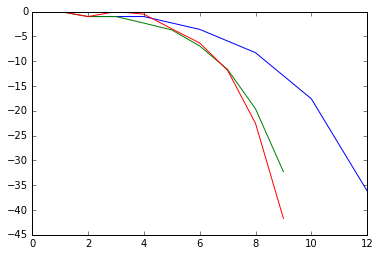

In [8]:
def IQI(func,x0,x1,x2,tol):
    iterates=[x0,x1,x2]
    f0=func(x0)
    f1=func(x1)
    f2=func(x2)
    new=f1*f2/((f2-f0)*(f1-f0))*x0 + f0*f2/((f2-f1)*(f0-f1))*x1 + f0*f1/((f0-f2)*(f1-f2))*x2
    iterates.append(new)
    test=func(new)
    while abs(test) > tol:
        f0=f1
        x0=x1
        x1=x2
        f1=f2
        f2=test
        x2=new
        new=f1*f2/((f2-f0)*(f1-f0))*x0 + f0*f2/((f2-f1)*(f0-f1))*x1 + f0*f1/((f0-f2)*(f1-f2))*x2
        iterates.append(new)
        test=func(new)
    return iterates

iqi=IQI(fx,0,.5,2.0,1E-15)
print iqi


plt.figure()

iqi_evals=np.array(range(1,len(iqi)+1))
plt.plot(np.array(new_evals),np.log2(np.abs(new-1)))
plt.plot(np.array(sec_evals),np.log2(np.abs(sec-1)))
plt.plot(iqi_evals,np.log2(np.abs(np.array(iqi)-1)))
        
    

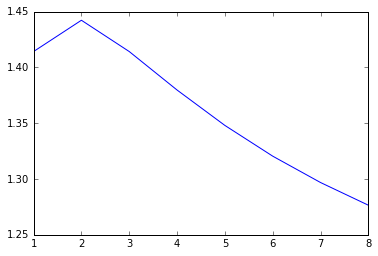

In [6]:
plt.figure()
d=np.array(range(1,9))
plt.plot(d,np.power(d+1,1.0/(d+1)))